#Homework 4

##Question 1

###1a

In [ ]:
'''
A plot of a simulated trajectory from t = 0 to t = 100 time units.
Hint: Remember when plotting that jumps are instantaneous; the M can never take on non-integer values.
'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_1 = 10       # synthesis rate
beta_1 = 1          # degradation rate
M_initial = 0       # initial molecule count
t_max = 100         # max simulation time

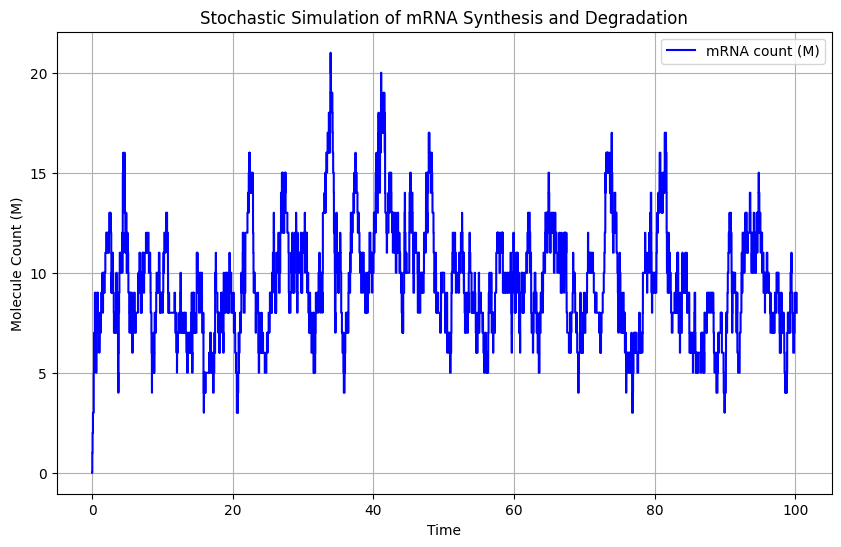

In [3]:
# variables
t = 0               # initial time
M = M_initial       # initial molecule count of mRNA
time_points = [t]   # to store time points
molecule_counts = [M]  # to store molecule counts over time

while t < t_max:
    rate_synthesis = lambda_1             # Rate for synthesis reaction
    rate_degradation = beta_1 * M         # Rate for degradation reaction
    rates = [rate_synthesis, rate_degradation]  # List of rates

    # Calculate total rate
    r_tot = sum(rates)

    # no reactions can occur
    if r_tot == 0:
        break

    # waiting time for the next reaction
    t_wait = -np.log(1 - np.random.rand()) / r_tot
    t += t_wait

    # Choose which reaction occurs based on probabilities
    u_rx = np.random.rand()
    if u_rx < rate_synthesis / r_tot:  # Synthesis reaction
        M += 1  # Update molecule count for synthesis
    elif u_rx < (rate_synthesis + rate_degradation) / r_tot:  # Degradation reaction
        M = max(M - 1, 0)  # Update molecule count for degradation, ensuring non-negative M

    time_points.append(t)
    molecule_counts.append(M)

# Plotting the simulation results
plt.figure(figsize=(10, 6))
plt.step(time_points, molecule_counts, where='post', color="b", label="mRNA count (M)")
plt.xlabel("Time")
plt.ylabel("Molecule Count (M)")
plt.title("Stochastic Simulation of mRNA Synthesis and Degradation")
plt.legend()
plt.grid(True)
plt.savefig('1a.png')
plt.show()


In [4]:
from google.colab import files
files.download('1a.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###1b

In [ ]:
'''
Determine the mean and variance of the process from your simulation.
Hint 1: Remember our discussion in class! Naively averaging the series of M values from your simulation will give you the wrong answer!
        Your approach must account for the amount of time spent in each state.
Hint 2: To get accurate answers, make sure your simulations run for many mRNA lifetimes or run many replicate simulations.
'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Parameters
lambda_1 = 10       # synthesis rate
beta_1 = 1          # degradation rate
M_initial = 0       # initial molecule count
t_max = 100         # max simulation time
n_traj = 100        # number of trajectories to simulate

In [3]:
#evenly spaced time points up to t_max
resampled_times = np.linspace(0, t_max, 1000)

# to store resampled trajectories
resampled_trajectories = np.zeros((n_traj, len(resampled_times)))

# resampling
def resample(time_points, molecule_counts, new_times):
    resampled_counts = np.zeros_like(new_times)
    current_index = 0
    for i, t_new in enumerate(new_times):
        # Ensure molecule counts are carried forward to the next time point until a new one is reached
        while current_index < len(time_points) - 1 and time_points[current_index] <= t_new:
            current_index += 1
        resampled_counts[i] = molecule_counts[max(current_index - 1, 0)]
    return resampled_counts

In [4]:
# Run multiple simulations and store resampled trajectories
for n in range(n_traj):
    # Initialize variables for each trajectory
    t = 0
    M = M_initial
    time_points = [t]
    molecule_counts = [M]

    # Single trajectory simulation
    while t < t_max:
        rate_synthesis = lambda_1
        rate_degradation = beta_1 * M
        rates = [rate_synthesis, rate_degradation]
        r_tot = sum(rates)
        if r_tot == 0:
            break  # Stop if no reactions can occur

        # Determine waiting time and update time
        t_wait = -np.log(1 - np.random.rand()) / r_tot
        t += t_wait
        u_rx = np.random.rand()

        # Reaction choice
        if u_rx < rate_synthesis / r_tot:
            M += 1
        elif u_rx < (rate_synthesis + rate_degradation) / r_tot:
            M = max(M - 1, 0)

        # Store results
        time_points.append(t)
        molecule_counts.append(M)

    # Resample this trajectory and store it in the resampled_trajectories array
    resampled_counts = resample(time_points, molecule_counts, resampled_times)
    resampled_trajectories[n, :] = resampled_counts

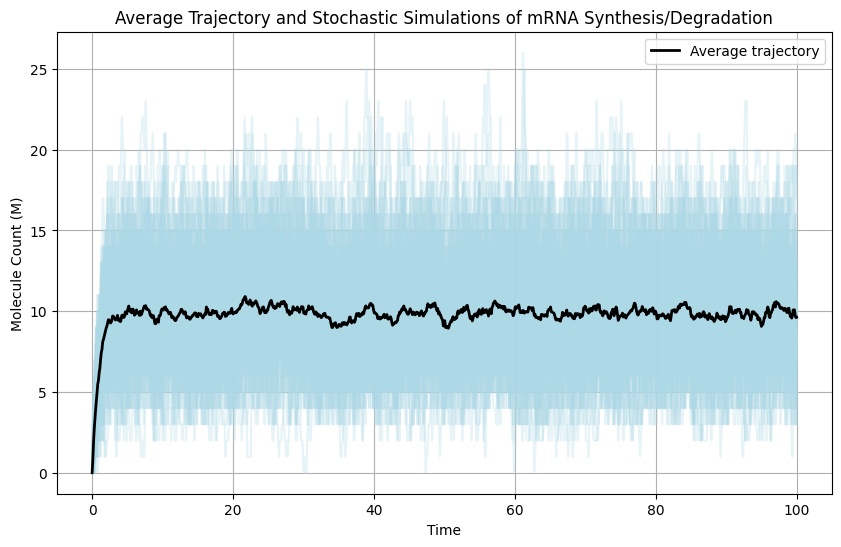

In [5]:
# mean and variance across all resampled trajectories
mean_mRNA = np.mean(resampled_trajectories, axis=0)
variance_mRNA = np.var(resampled_trajectories, axis=0)

# Plotting resampled trajectories
plt.figure(figsize=(10, 6))
for n in range(n_traj):
    plt.plot(resampled_times, resampled_trajectories[n, :], color="lightblue", alpha=0.3)

# average trajectory
plt.plot(resampled_times, mean_mRNA, color="black", linewidth=2, label="Average trajectory")
plt.xlabel("Time")
plt.ylabel("Molecule Count (M)")
plt.title("Average Trajectory and Stochastic Simulations of mRNA Synthesis/Degradation")
plt.legend()
plt.grid(True)
plt.savefig('1b.png')
plt.show()

In [6]:
import numpy as np

# Define the run_ssa function as provided previously
def run_ssa(lambda_1, beta_1, M_initial, t_max):
    t = 0
    M = M_initial
    time_points = [t]
    molecule_counts = [M]

    while t < t_max:
        rate_synthesis = lambda_1
        rate_degradation = beta_1 * M
        r_tot = rate_synthesis + rate_degradation

        if r_tot == 0:
            break

        # Determine time until next reaction
        t_wait = -np.log(1 - np.random.rand()) / r_tot
        t += t_wait

        # Choose the reaction
        if np.random.rand() < rate_synthesis / r_tot:
            M += 1
        else:
            M = max(M - 1, 0)

        time_points.append(t)
        molecule_counts.append(M)

    return time_points, molecule_counts

In [7]:
def compute_time_weighted_stats(lambda_1, beta_1, M_initial, t_max, n_simulations):
    all_means = []
    all_means_squared = []

    for _ in range(n_simulations):
        time_points, molecule_counts = run_ssa(lambda_1, beta_1, M_initial, t_max)

        # time intervals
        time_intervals = np.diff(time_points)

        # Time-weighted mean and mean of squared counts for this trajectory
        time_weighted_mean = np.sum(np.array(molecule_counts[:-1]) * time_intervals) / time_points[-1]
        time_weighted_mean_squared = np.sum((np.array(molecule_counts[:-1]) ** 2) * time_intervals) / time_points[-1]

        all_means.append(time_weighted_mean)
        all_means_squared.append(time_weighted_mean_squared)

    # mean and variance across simulations
    mean_mRNA = np.mean(all_means)
    mean_squared_mRNA = np.mean(all_means_squared)
    variance_mRNA = mean_squared_mRNA - mean_mRNA ** 2

    return mean_mRNA, variance_mRNA


In [8]:
# Params
lambda_1 = 10      # synthesis rate
beta_1 = 1         # degradation rate
M_initial = 0      # initial molecule count
t_max = 1000       # extended max simulation time for accuracy
n_simulations = 100  # number of simulations to average

mean_mRNA, variance_mRNA = compute_time_weighted_stats(lambda_1, beta_1, M_initial, t_max, n_simulations)

print("Mean mRNA count over time (time-weighted):", mean_mRNA)
print("Variance in mRNA count over time (time-weighted):", variance_mRNA)

Mean mRNA count over time (time-weighted): 9.983124090274384
Variance in mRNA count over time (time-weighted): 10.050564393764574


In [9]:
from google.colab import files
files.download('1b.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###1c

In [ ]:
'''
 Revisit your simulations from (b) and identify every instance where the system resides in the state M = 5.
 Plot a histogram of the waiting times (i.e. the duration of each visit to the state). Generate the same plot for all visits to the state M = 15.
'''

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def collect_waiting_times(lambda_1, beta_1, M_initial, t_max, n_simulations, target_states):
    waiting_times = {state: [] for state in target_states}

    for _ in range(n_simulations):
        # Run simulation
        time_points, molecule_counts = run_ssa(lambda_1, beta_1, M_initial, t_max)

        #calculate the waiting times
        for target_state in target_states:
            start_time = None  # Time when we first reach the target state

            # Iterate through the states in the trajectory
            for i in range(1, len(molecule_counts)):
                if molecule_counts[i] == target_state:
                    # If we're entering the target state
                    if start_time is None:
                        start_time = time_points[i - 1]

                else:
                    # If we're leaving the target state
                    if start_time is not None:
                        # Calculate the waiting time and store it
                        waiting_times[target_state].append(time_points[i - 1] - start_time)
                        start_time = None  # Reset start time

    return waiting_times


In [11]:
def plot_histograms(waiting_times, target_states):
    # Plot histograms for each target state
    for state in target_states:
        plt.hist(waiting_times[state], bins=20, alpha=0.7, label=f"M = {state}")
        plt.xlabel("Waiting Time")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Waiting Times for M = {state}")
        plt.legend()
        plt.savefig(f'1c_{state}.png')
        plt.show()

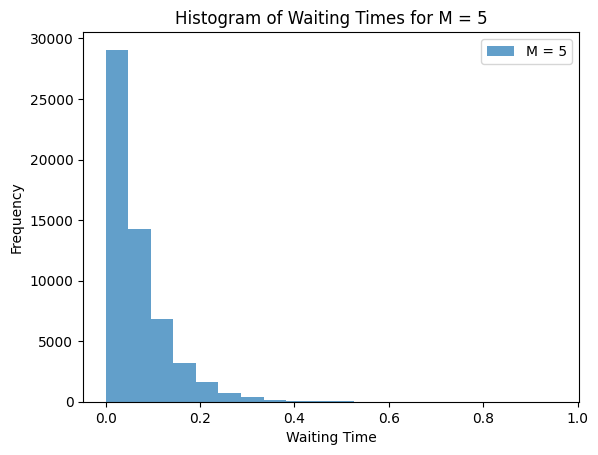

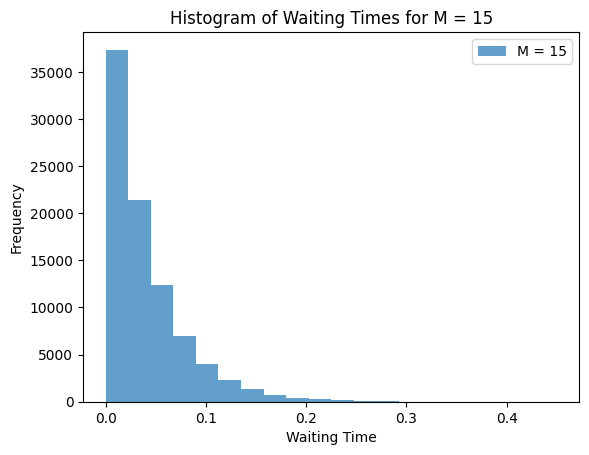

In [12]:
# Params
lambda_1 = 10
beta_1 = 1
M_initial = 0
t_max = 1000
n_simulations = 100
target_states = [5, 15]

# Collect waiting times
waiting_times = collect_waiting_times(lambda_1, beta_1, M_initial, t_max, n_simulations, target_states)

# hists
plot_histograms(waiting_times, target_states)

In [13]:
files.download('1c_5.png')
files.download('1c_15.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Question 2

###2b

In [ ]:
'''
Report the mean and variance for the fully elongated species, $M_3$. Is the variance larger, smaller or equal to what you saw in problem 1b?
'''

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_elongation(lambda_1, beta_1, t_max, num_simulations=1000):
    """
    Gillespie simulation for mRNA elongation with three intermediate steps.

    Parameters:
        lambda_1 (float): Elongation rate for each step.
        beta_1 (float): Degradation rate for the fully elongated species (M3).
        t_max (float): Maximum time for each simulation.
        num_simulations (int): Number of simulations to run.

    Returns:
        mean_M3 (float): Mean copy number of fully elongated species M3 across simulations.
        variance_M3 (float): Variance of M3 copy number across simulations.
    """
    M3_final_counts = []  # Store counts of M3 for each simulation

    for _ in range(num_simulations):
        M1, M2, M3 = 0, 0, 0
        t = 0

        while t < t_max:
            # Calculate rates for each reaction
            rate_synthesis = lambda_1                # Production of M1
            rate_elongate_1_to_2 = lambda_1 * M1     # Conversion of M1 to M2
            rate_elongate_2_to_3 = lambda_1 * M2     # Conversion of M2 to M3
            rate_degradation = beta_1 * M3           # Degradation of M3
            rates = [rate_synthesis, rate_elongate_1_to_2, rate_elongate_2_to_3, rate_degradation]
            r_tot = sum(rates)

            # if no reactions are possible
            if r_tot == 0:
                break

            # Time until next rxn
            t_wait = -np.log(np.random.rand()) / r_tot
            t += t_wait

            # Determine which reaction occurs
            r_choice = np.random.rand() * r_tot
            if r_choice < rate_synthesis:
                M1 += 1  # Synthesis of M1
            elif r_choice < rate_synthesis + rate_elongate_1_to_2:
                M1 -= 1
                M2 += 1  # Elongation M1 to M2
            elif r_choice < rate_synthesis + rate_elongate_1_to_2 + rate_elongate_2_to_3:
                M2 -= 1
                M3 += 1  # Elongation M2 to M3
            else:
                M3 -= 1  # Degradation of M3

        M3_final_counts.append(M3)

    # mean and variance of M3 across simulations
    mean_M3 = np.mean(M3_final_counts)
    variance_M3 = np.var(M3_final_counts)

    return mean_M3, variance_M3, M3_final_counts


Mean of M3 across simulations: 9.874
Variance of M3 across simulations: 10.392123999999999


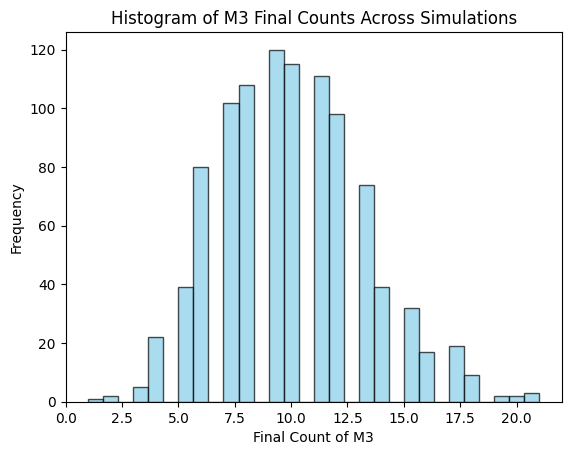

In [16]:
# params
lambda_1 = 10   # Elongation rate for each step
beta_1 = 1      # Degradation rate for fully elongated species M3
t_max = 100     # Simulation time
num_simulations = 1000

# Run the simulation
mean_M3, variance_M3, M3_final_counts = simulate_elongation(lambda_1, beta_1, t_max, num_simulations)

print(f"Mean of M3 across simulations: {mean_M3}")
print(f"Variance of M3 across simulations: {variance_M3}")

# Plot histogram of M3 counts across simulations
plt.hist(M3_final_counts, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel("Final Count of M3")
plt.ylabel("Frequency")
plt.title("Histogram of M3 Final Counts Across Simulations")
plt.show()


###2c

In [17]:
def simulate_elongation_with_wait_times(lambda_1, beta_1, t_max, num_simulations=1000):
    """
    Gillespie simulation for mRNA elongation with three intermediate steps,
    recording waiting times between successive M3 synthesis events.

    Parameters:
        lambda_1 (float): Elongation rate for each step.
        beta_1 (float): Degradation rate for the fully elongated species (M3).
        t_max (float): Maximum time for each simulation.
        num_simulations (int): Number of simulations to run.

    Returns:
        all_waiting_times (list of float): List of all waiting times between M3 synthesis events.
    """
    all_waiting_times = []

    for _ in range(num_simulations):
        M1, M2, M3 = 0, 0, 0
        t = 0
        last_M3_synthesis_time = None  # To record the time of the last M3 synthesis event

        while t < t_max:
            # rates for each reaction
            rate_synthesis = lambda_1                # Production of M1
            rate_elongate_1_to_2 = lambda_1 * M1     # Conversion of M1 to M2
            rate_elongate_2_to_3 = lambda_1 * M2     # Conversion of M2 to M3
            rate_degradation = beta_1 * M3           # Degradation of M3
            rates = [rate_synthesis, rate_elongate_1_to_2, rate_elongate_2_to_3, rate_degradation]
            r_tot = sum(rates)

            # no rxn
            if r_tot == 0:
                break

            # Time until next reaction
            t_wait = -np.log(np.random.rand()) / r_tot
            t += t_wait

            # Determine which reaction occurs
            r_choice = np.random.rand() * r_tot
            if r_choice < rate_synthesis:
                M1 += 1  # Synthesis of M1
            elif r_choice < rate_synthesis + rate_elongate_1_to_2:
                M1 -= 1
                M2 += 1  # Elongation M1 to M2
            elif r_choice < rate_synthesis + rate_elongate_1_to_2 + rate_elongate_2_to_3:
                M2 -= 1
                M3 += 1  # Elongation M2 to M3 (synthesis event)

                # Record the waiting time if this is a successive synthesis event
                if last_M3_synthesis_time is not None:
                    waiting_time = t - last_M3_synthesis_time
                    all_waiting_times.append(waiting_time)

                # Update synthesis time
                last_M3_synthesis_time = t

            else:
                M3 -= 1  # Degradation of M3

    return all_waiting_times


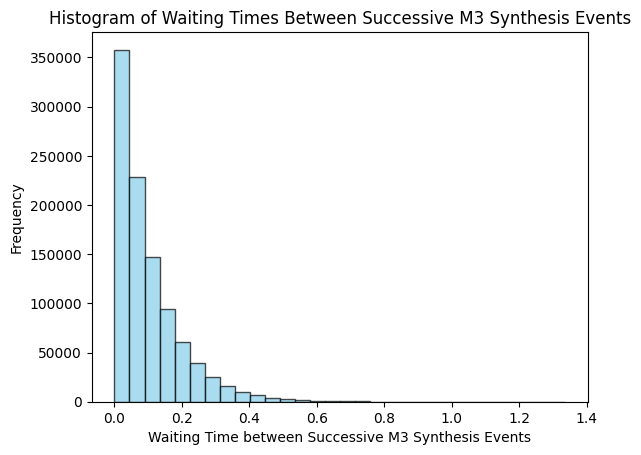

In [19]:
# params
lambda_1 = 10   # Elongation rate for each step
beta_1 = 1      # Degradation rate for fully elongated species M3
t_max = 100     # Simulation time
num_simulations = 1000

# Run
waiting_times = simulate_elongation_with_wait_times(lambda_1, beta_1, t_max, num_simulations)

# Plot histogram
plt.hist(waiting_times, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel("Waiting Time between Successive M3 Synthesis Events")
plt.ylabel("Frequency")
plt.title("Histogram of Waiting Times Between Successive M3 Synthesis Events")
plt.savefig('2c.png')
plt.show()

In [20]:
files.download('2c.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Question 3

Equations from lecture

$\langle x \rangle = \frac{b \cdot \lambda}{\beta}$

$\eta = \frac{1}{\tau_x}$
$D = \frac{2}{\tau_x}$

step size is $\delta$

$\langle |\delta | \rangle = \frac{b+1}{2}$

###3a

In [21]:
def run_bursty_ssa(lambda_1, beta_1, b, M_initial, t_max):
    """
    bursty mRNA synthesis and degradation

    Parameters:
        lambda_1 (float): Burst initiation rate.
        beta_1 (float): Degradation rate.
        b (int): Burst size (number of mRNAs produced in each burst).
        M_initial (int): Initial molecule count of mRNA.
        t_max (float): Maximum simulation time.

    Returns:
        M_values (list): List of molecule counts over time.
    """
    t = 0  # initial time
    M = M_initial  # initial molecule count
    M_values = []  # to store molecule counts

    while t < t_max:
        # Rates
        rate_synthesis = lambda_1  # Burst synthesis rate
        rate_degradation = beta_1 * M  # Degradation rate
        r_tot = rate_synthesis + rate_degradation

        if r_tot == 0:
            break

        # Time until next reaction
        t_wait = -np.log(np.random.rand()) / r_tot
        t += t_wait

        # which reaction occurs
        if np.random.rand() < rate_synthesis / r_tot:
            M += b  # Add burst size b to M for synthesis
        else:
            M = max(M - 1, 0)  # Decrement M by 1 for degradation

        M_values.append(M)

    return M_values

In [22]:
# Params
beta_1 = 1        # Degradation rate
M_initial = 0     # Initial mRNA molecule count
t_max = 500       # Max simulation time for stability in mean and variance


burst_sizes = [1, 5, 10]
lambda_values = [1, 5, 10, 20, 50]
results = {}

for b in burst_sizes:
    means = []
    variances = []
    for lambda_1 in lambda_values:
        # Run multiple simulations
        M_values_all = []
        for _ in range(50):  # 50 replicates for averaging
            M_values = run_bursty_ssa(lambda_1, beta_1, b, M_initial, t_max)
            M_values_all.extend(M_values)

        # mean and variance
        mean_M = np.mean(M_values_all)
        var_M = np.var(M_values_all)

        means.append(mean_M)
        variances.append(var_M / mean_M**2)  # normalized var

    results[b] = (means, variances)


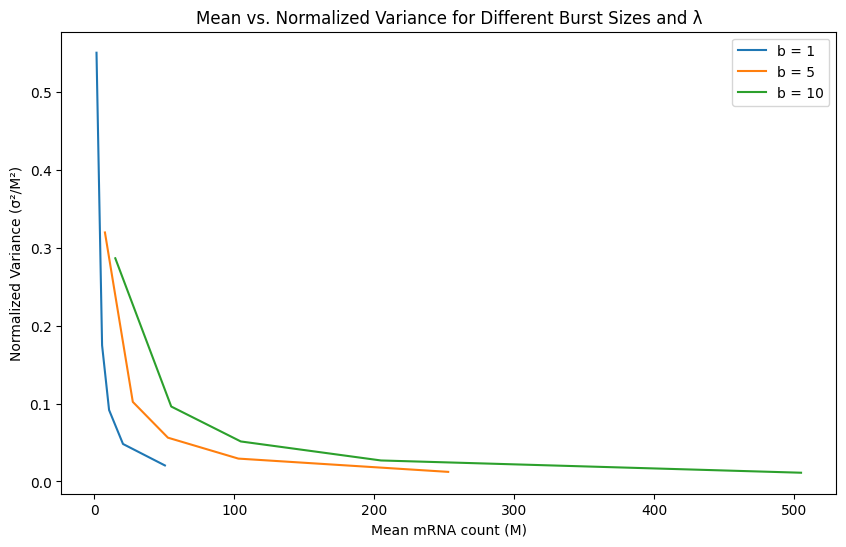

In [23]:
 #Plotting
plt.figure(figsize=(10, 6))

for b, (means, normalized_variances) in results.items():
    plt.plot(means, normalized_variances, label=f"b = {b}")

plt.xlabel("Mean mRNA count (M)")
plt.ylabel("Normalized Variance (σ²/M²)")
plt.title("Mean vs. Normalized Variance for Different Burst Sizes and λ")
plt.legend()
plt.savefig('3a.png')
plt.show()

In [24]:
files.download('3a.png')
#

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>